# Orbit model of P.A. for slit rotation

We want to place the IGRINS slit along the line connecting the two components.  Here we follow the [astrometric orbit fitting tutorial](https://docs.exoplanet.codes/en/stable/tutorials/astrometric/) in the [exoplanet](https://docs.exoplanet.codes/en/stable/) framework to determine the P.A.


In [1]:
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import exoplanet as xo

from astropy import constants

# conversion constant from au to R_sun
au_to_R_sun = (constants.au / constants.R_sun).value

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We take orbital parameters for Luhman 16 from Table 5 of [Lazorenko & Sahlmann 2018](https://ui.adsabs.harvard.edu/abs/2018A%26A...618A.111L/abstract):

| Param | Value|
|-- | -- |
|$a$ (mas)			| 1784.0|
|$a$ (AU)			| 3.557|
|$e$			      | 0.343 |
|$P$ (yr)			| 27.54|
|$T_0$ (yr)			| 2017.78|
|$i$ (deg)			| 100.26|
|$\omega$ (deg)			| 128.1|
|$\Omega$ (deg)			| 139.67|
|$M_{tot}$ ($M_{\mathrm{Jup} }$)	| 		62.06|
|$M_A$ ($M_{\mathrm{Jup} }$)		| 	33.51|
|$M_B$ ($M_{\mathrm{Jup} }$)		| 	28.55|

In [3]:
parallax = 501.557 # mas

In [4]:
a = (3.557 * u.AU).to(u.Rsun).value
e = 0.343
i = 100.26 * np.pi / 180  # [rad]
omega = 128.1 * np.pi / 180  # Pourbaix reports omega_2, but we want omega_1
Omega = 139.67 * np.pi / 180
P = 27.54 * 365.25  # days

T0 = Time(2017.78, format="decimalyear")
T0.format = "jd"
T0 = T0.value  # [Julian Date]

In [5]:
T0

2458039.2

In [6]:
# instantiate the orbit
orbit = xo.orbits.KeplerianOrbit(
    a=a, t_periastron=T0, period=P, incl=i, ecc=e, omega=omega, Omega=Omega
)

In [7]:
import theano
import theano.tensor as tt

In [8]:
t = np.linspace(T0 - P, T0 + P, num=200)  # days
rho, theta = theano.function([], orbit.get_relative_angles(t, parallax))()

In [9]:
current_jd = Time.now().jd
current_decyear = Time.now().decimalyear

In [10]:
rho_now, theta_now = theano.function([], orbit.get_relative_angles(current_jd, parallax))()

In [11]:
Thst_i = Time(2014.64, format="decimalyear").jd
Thst_f = Time(2016.76, format="decimalyear").jd

In [12]:
t_hst = np.linspace(Thst_i,Thst_f, num=200)  # days
rho_hst, theta_hst = theano.function([], orbit.get_relative_angles(t_hst, parallax))()

In [13]:
import seaborn as sns

In [14]:
sns.set_style('darkgrid')
sns.set_context('talk')

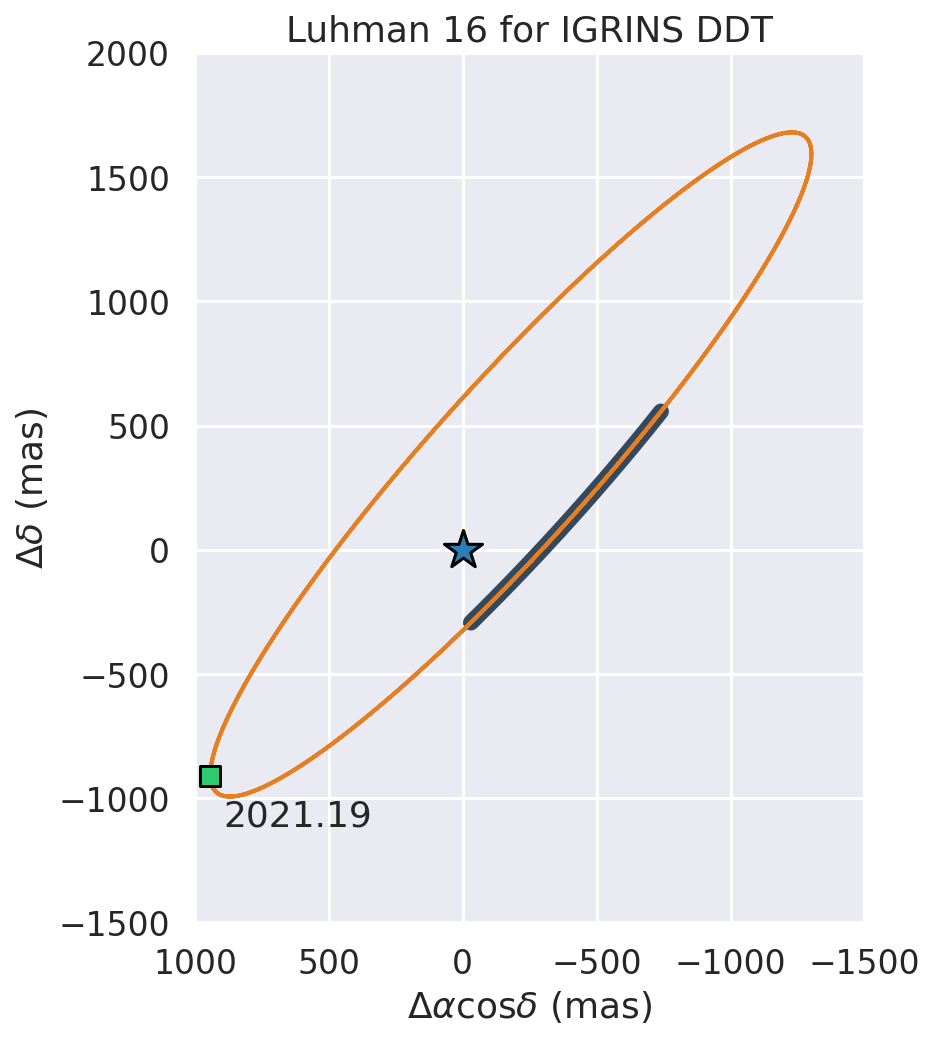

In [15]:
# Plot the orbit
fig, ax = plt.subplots(nrows=1, figsize=(6, 8))

xs = rho * np.cos(theta)  # X is north
ys = rho * np.sin(theta)  # Y is east
plt.scatter([0], [0], marker='*', s=400, c='#2980b9', ec='k')
ax.plot(ys, xs, lw=2, color='#e67e22')



xnow = rho_now * np.cos(theta_now)  # X is north
ynow = rho_now * np.sin(theta_now)  # Y is east

xhst = rho_hst * np.cos(theta_hst)  # X is north
yhst = rho_hst * np.sin(theta_hst)  # Y is east

ax.plot(yhst, xhst, lw=8, color='#34495e', zorder=1)


label = '{:0.2f}'.format(current_decyear)
plt.scatter([ynow], [xnow], marker='s', s=100, c='#2ecc71', ec='k', 
            label = label, zorder=10)

plt.text(ynow-50, xnow-200, label)

plt.ylim(-1500, 2000)
plt.xlim(1000, -1500)
plt.xlabel(r'$\Delta \alpha \cos \delta$ (mas)')
plt.ylabel(r'$\Delta \delta $ (mas)')
plt.title('Luhman 16 for IGRINS DDT')
plt.savefig('../figures/Luhman16_orbit_demo.png', bbox_inches='tight', dpi=300)

What are the separation and PA right now?

In [16]:
rho_now

array(1311.02619645)

In [17]:
theta_now * 180/np.pi

133.97162540351064